In [27]:
import tensorflow as tf 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [28]:
base_model = MobileNetV2(weights = 'imagenet',include_top = False , input_shape=(224,224,3))

In [29]:
base_model.trainable = False

In [30]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation = 'relu')(x)
predictions = Dense(5,activation = 'softmax')(x)

In [31]:
model = Model(inputs = base_model.input , outputs = predictions)

In [32]:
model.compile (optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
datagen = ImageDataGenerator(rescale = 1. / 255 , 
                             validation_split = 0.3 ,
                             horizontal_flip = True,
                             zoom_range = 0.2,
                             shear_range = 0.2
                            )

In [34]:
train_datagenerator = datagen.flow_from_directory(
    '11 Flowers/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training' #set as traning data    
)

Found 2277 images belonging to 5 classes.


In [35]:
validation_generator = datagen.flow_from_directory(
    '11 Flowers/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 157 images belonging to 5 classes.


In [36]:
model.fit(train_datagenerator , 
         epochs = 10 ,
         validation_data = validation_generator)

Epoch 1/10


C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6833 - loss: 0.8522 - val_accuracy: 0.8408 - val_loss: 0.4468
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8845 - loss: 0.3418 - val_accuracy: 0.8217 - val_loss: 0.4153
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8915 - loss: 0.3071 - val_accuracy: 0.8854 - val_loss: 0.3128
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9308 - loss: 0.2056 - val_accuracy: 0.8535 - val_loss: 0.3376
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9380 - loss: 0.1779 - val_accuracy: 0.8535 - val_loss: 0.3685
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9385 - loss: 0.1652 - val_accuracy: 0.8662 - val_loss: 0.4071
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9650 - loss: 0.1158 - val_accuracy: 0.8535 - val_loss: 0.4387
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9628 - loss: 0.1138 - val_accuracy: 0.8535 - val_loss: 0.

In [37]:
test_loss ,  test_acc = model.evaluate(validation_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8851 - loss: 0.2537


In [38]:
x_val , y_val = next(validation_generator)
predictions = model.predict(x_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [39]:
predicted_labels = np.argmax(predictions , axis=1)

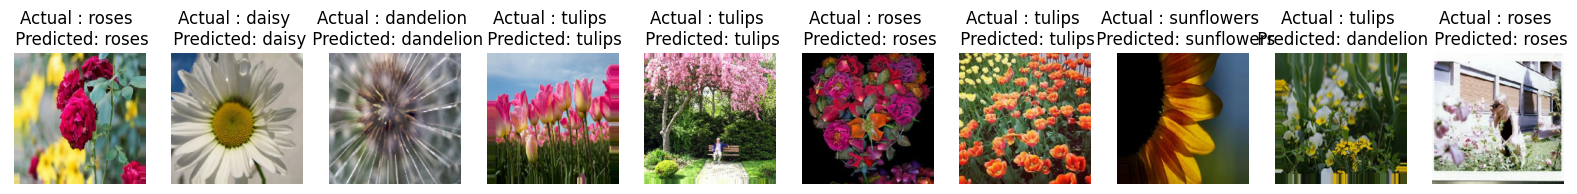

In [43]:
class_labels = list(train_datagenerator.class_indices.keys())

n = 10

plt.figure(figsize=(20,6))
for i in range(n):
    ax = plt.subplot(2, n , i+1)
    plt.imshow(x_val[i])

    actual_label = class_labels[np.argmax(y_val[i])]
    predicted_label = class_labels[predicted_labels[i]]

    plt.title(f"Actual : {actual_label} \n Predicted: {predicted_label}")
    plt.axis('off')
plt.show()